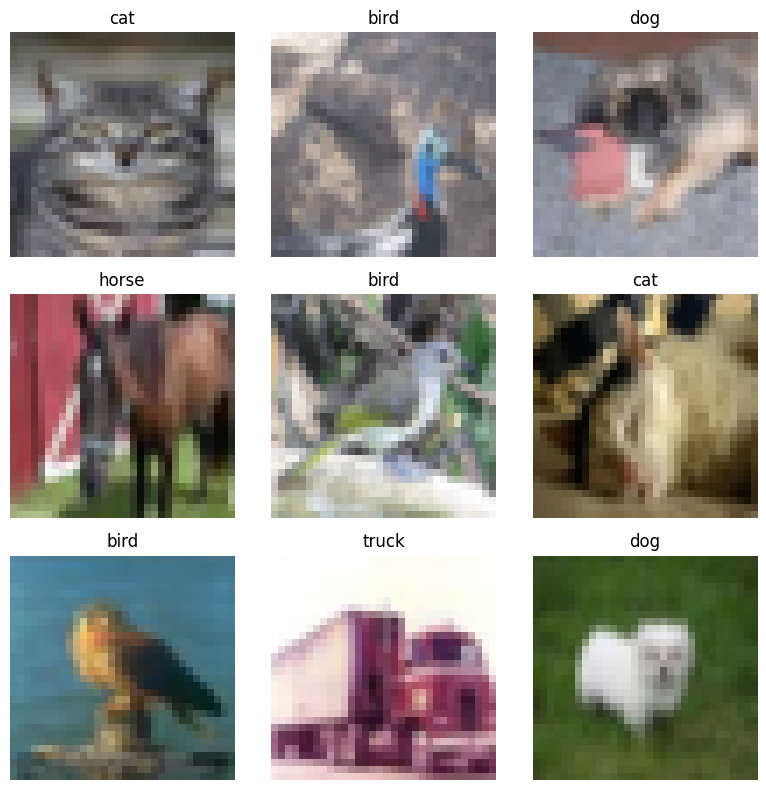

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.3305 - loss: 1.8185 - val_accuracy: 0.5295 - val_loss: 1.3402
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5001 - loss: 1.3830 - val_accuracy: 0.5693 - val_loss: 1.2183
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.5413 - loss: 1.2833 - val_accuracy: 0.5859 - val_loss: 1.1833
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5761 - loss: 1.1903 - val_accuracy: 0.6091 - val_loss: 1.1236
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.5929 - loss: 1.1286 - val_accuracy: 0.6199 - val_loss: 1.0842
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6134 - loss: 1.0768 - val_accuracy: 0.6252 - val_loss: 1.0552
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.6284 - loss: 1.0331 - val_accuracy: 0.6279 - val_loss: 1.0726
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.6434 - loss: 0.9977 - 

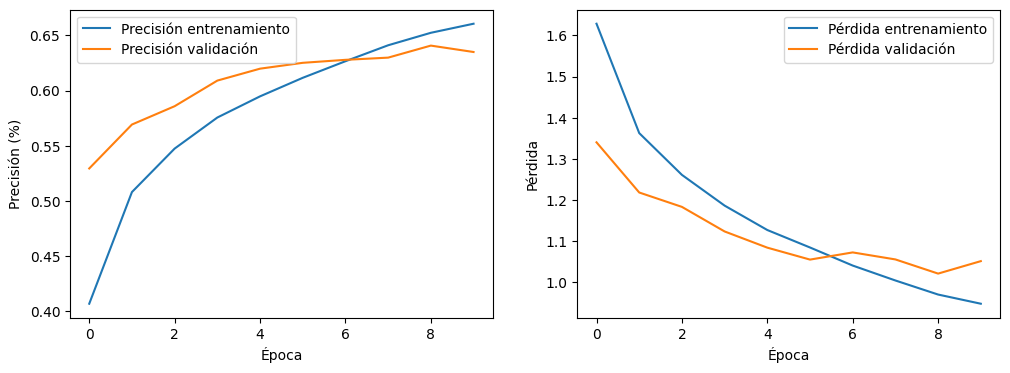

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


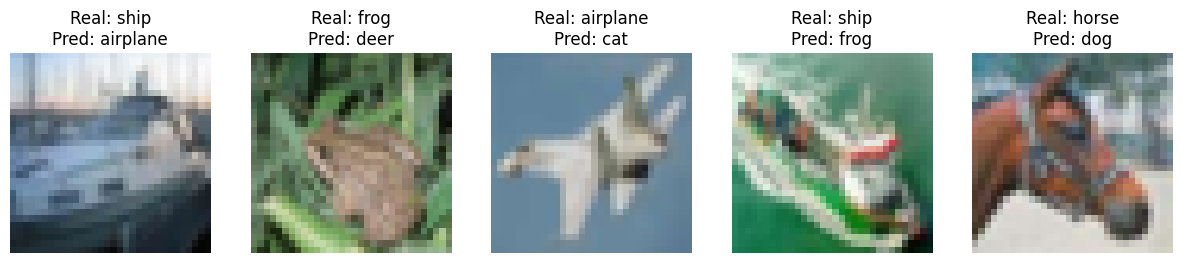

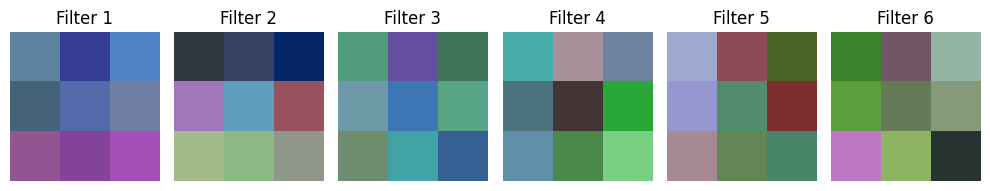

In [ ]:
# Exercise 2 - CNN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# CIFAR-10 Dataset
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess the images (Normalizar imágenes y convertir etiquetas a one-hot encoding)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Visualize random Sample Images
plt.figure(figsize=(8,8))
random_indices = np.random.choice(len(train_images), 9, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[idx])
    plt.title(f"{class_names[np.argmax(train_labels[idx])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Build CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model summary
model.summary()

# Train CNN
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

# Accuracy report
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

#Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión (%)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#Hacer predicciones y visualizar misclassified images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
misclassified = np.where(predicted_classes != true_classes)[0]

plt.figure(figsize=(15, 5))
for i in range(5):
    idx = misclassified[i]
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[idx])
    plt.title(f"Real: {class_names[true_classes[idx]]}\nPred: {class_names[predicted_classes[idx]]}")
    plt.axis('off')
plt.show()

# Visualize filters from first convolutional layer
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters = 6 #Amount of filters
plt.figure(figsize=(10,4))
for i in range(n_filters):
    f = filters[:, :, :, i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f)
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.tight_layout()
plt.show()